In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
import numpy as np

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
sess = tf.InteractiveSession()

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
sess.run(tf.global_variables_initializer())

In [7]:
y = tf.matmul(x,W) + b
ys = tf.nn.softmax(y)

In [8]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [10]:
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [11]:
tf.argmax(y,1).eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels})

array([9, 8, 0, ..., 6, 7, 8])

In [12]:
ys.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels}).shape

(55000, 10)

In [30]:
num_to_turn_into = 8
var_grad = tf.gradients(ys[:,num_to_turn_into], x)[0]
grad_eval = sess.run(var_grad, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
grad_eval.shape

(55000, 784)

In [20]:
Weval = sess.run(W,feed_dict={x: mnist.train.images, y_: mnist.train.labels})

In [43]:
np.argwhere(np.argwhere(mnist.train.labels == 1) == )

array([[    0,     1],
       [    9,     0],
       [   12,     1],
       ...,
       [54973,     1],
       [54974,     1],
       [54975,     1]])

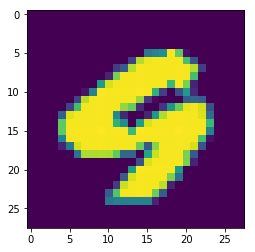

In [51]:
plt.imshow(mnist.train.images[54973].reshape([28,28]))

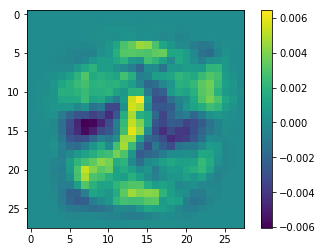

In [52]:
plt.imshow(grad_eval[54973,:].reshape([28,28]))
plt.colorbar()

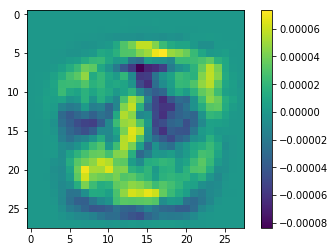

In [48]:
plt.imshow(grad_eval[12,:].reshape([28,28]))
plt.colorbar()

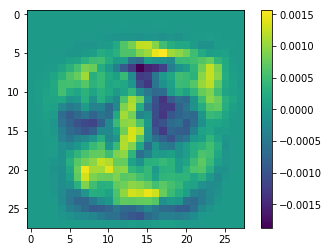

In [50]:
plt.imshow(-grad_eval[12,:].reshape([28,28]) + grad_eval[0,:].reshape([28,28]))
plt.colorbar()

# Evaluating the gradient at arbitray points

In [90]:
mnist.train.images[0].reshape([1,784]).shape

(1, 784)

In [54]:
arbitrary_grad_eval = sess.run(var_grad, feed_dict={x: mnist.train.images+0.001, y_: mnist.train.labels})

In [55]:
arbitrary_grad_eval.shape

(55000, 784)

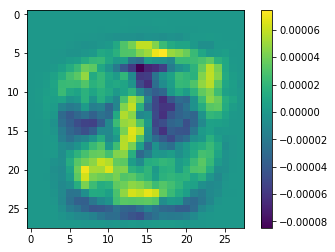

In [56]:
plt.imshow(arbitrary_grad_eval[12,:].reshape([28,28]))
plt.colorbar()

# Create a function which, given a gradient vector, projects another vector onto the orthogonal complement of the gradient vector

In [57]:
test_vec = np.array([1,2,3])

In [142]:
def orth_proj(vec, proj_vec):
    #computes the orthogonal projection of proj_vec onto the orthogonal complement of vec
    x = np.matrix(vec).T
    print('x is')
    print(x.T)
    P = x * x.T / (x.T * x) # projector onto the space spanned by x
    print("P is")
    print(P)
    Pperp = np.identity(len(vec)) - P # projector onto x's orthogonal complement
    return np.asarray(np.matrix(proj_vec)*Pperp)[0]

In [76]:
orth_proj(test_vec, np.array([1,2,1]))

[[0.07142857 0.14285714 0.21428571]
 [0.14285714 0.28571429 0.42857143]
 [0.21428571 0.42857143 0.64285714]]


array([ 0.42857143,  0.85714286, -0.71428571])

# For a given mnist picture, make a random walk in orthogonal space

In [164]:
def chop(pic):
    copy_pic = np.copy(pic)
    copy_pic[copy_pic >= 1] = 0.999999
    copy_pic[copy_pic < 0.01] = 0.0
    return copy_pic

In [206]:
def compute_sum_grad(curr_pic):
    c = []
    for i in range(10):
        var_grad = tf.gradients(ys[:,i], x)[0]
        g = sess.run(var_grad, feed_dict={x: curr_pic.reshape([1,len(curr_pic)])})
        c.append(g)
    return np.asarray(c).reshape([10,784]).sum(axis=0)

In [159]:
chop(mnist.train.images[1])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [236]:
def orth_walk(start_pic, sess, alpha = 10, num_steps = 10):
    var_grad = tf.gradients(ys, x)[0]
    curr_pic = start_pic
    pic_trajectory = []
    pic_trajectory.append(start_pic)
    random_vec = np.random.random_sample(len(start_pic))
    random_vec = random_vec/(np.linalg.norm(random_vec))
    for i in range(num_steps):
        print('curr_pic is:')
        print(curr_pic.reshape([1,len(start_pic)]))
        curr_grad = compute_sum_grad(curr_pic)
        #curr_grad = sess.run(var_grad, feed_dict={x: curr_pic.reshape([1,len(start_pic)])})
        #curr_grad = curr_grad/(np.linalg.norm(curr_grad))
        
        
        print('grad is')
        print(curr_grad)
        curr_pic = np.asarray(curr_pic + alpha*orth_proj(curr_grad, random_vec))
        #curr_pic = chop(curr_pic)
        curr_pic = (curr_pic-min(curr_pic))/(max(curr_pic)-min(curr_pic))
#         print("orth proj")
#         print(orth_proj(curr_grad, random_vec))
#         print("curr pic")
#         print(curr_pic)
#         print(curr_pic.shape)
        pic_trajectory.append(curr_pic)
        
    return np.asarray(pic_trajectory)

In [237]:
t = orth_walk(mnist.train.images[1], sess)

curr_pic is:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0. 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.07478479e-12 -9.09494702e-13  6.53699317e-13 -2.95319325e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.72892819e-13  2.79776202e-13 -1.64668279e-12 -1.07647224e-12
 -2.35331754e-11  4.15525392e-11 -1.59161573e-11  1.21190169e-10
  5.16138243e-11  5.69571057e-11 -7.38964445e-12 -6.54836185e-11
 -3.28327587e-10 -1.46883394e-10  1.64277481e-11  9.31095201e-11
 -1.25055521e-11  3.63513664e-11 -1.64845915e-12 -1.15463195e-12
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.13478149e-15 -7.99360578e-14
 -9.13047415e-13 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.19371180e-12 -8.10018719e-12 -1.60316205e-12  2.32036612e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.95898853e-13 -4.75397499e-13 -3.76987330e-12  2.16715534e-13
  3.62518904e-11 -5.18483034e-11 -5.87050408e-11 -2.39822384e-10
 -1.25737643e-10 -2.23735697e-10 -7.81597009e-11 -9.52127266e-11
  2.71484168e-10  8.86757334e-12 -7.29301064e-11 -1.27982958e-10
  2.13020712e-11 -3.30331318e-11  4.26325641e-14  5.09814413e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.28150832e-14 -2.11830553e-13
 -1.49613655e-12 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.04636308e-12 -9.09494702e-13  1.27897692e-13  3.41948692e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.61533067e-14 -9.76996262e-14  1.07576170e-11 -9.32232069e-12
  2.27373675e-12  8.69704309e-12 -4.67252903e-11  9.57243174e-11
  3.91082722e-11 -4.88853402e-11 -1.56887836e-11 -3.91082722e-11
 -1.52795110e-10  4.27462510e-11 -2.63753464e-11 -7.88986654e-11
 -4.27462510e-11 -1.06865627e-11 -6.50857146e-12  1.26476607e-12
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.65973959e-15  9.59232693e-14
 -1.36779477e-12 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.84741111e-13  4.97379915e-12 -1.17061916e-12  1.11022302e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.37057032e-13  1.50768287e-13  1.02318154e-12  6.05027139e-12
 -7.36122274e-12  3.30828698e-11  2.73701062e-11  7.11111170e-11
  1.40744305e-10  5.01927389e-11  5.37738742e-11 -4.25188773e-11
 -4.54747351e-13 -6.00266503e-11  6.99742486e-11 -1.76214598e-12
  1.11157306e-10  1.56745728e-11 -2.37676545e-12  7.85149723e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.48412402e-14  1.92734717e-13
  2.96296321e-12 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.39266376e-12 -7.16227078e-12  5.86197757e-14 -3.78030940e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.65894031e-14 -9.88098492e-14 -3.14770432e-12  4.26325641e-13
 -5.57065505e-12  1.45519152e-11 -4.54747351e-12  4.86579665e-11
 -4.86579665e-11 -2.98996383e-11 -9.39053280e-11 -8.43556336e-11
 -4.21096047e-10 -5.61612978e-11 -1.23350219e-11 -6.68478606e-11
 -5.68434189e-12 -3.68345354e-11  3.52429197e-12 -4.61852778e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.68749517e-15 -1.77635684e-15
 -8.34887715e-13 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.84439180e-12  2.95585778e-12 -1.47970525e-12 -1.13686838e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.70574707e-14  2.65121258e-13 -1.09423581e-12 -8.81072992e-12
 -3.27418093e-11  1.41540113e-11 -2.65458766e-11 -4.78621587e-11
  7.38964445e-11  4.44515535e-11  1.46428647e-10 -1.00044417e-11
 -4.51109372e-10 -3.54702934e-11  1.16813226e-10  7.80460141e-11
  4.60431693e-11  8.24229573e-13 -1.03739239e-12 -1.37490019e-12
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.39888101e-14  2.89546165e-13
  3.04467562e-12 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.22435437e-12  8.24229573e-12 -1.16751053e-12 -4.80171458e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.24289468e-13  3.57491814e-13 -1.09068310e-12  1.50635060e-12
 -5.71276360e-12  1.65414349e-11  4.45368187e-11  1.25623956e-10
  1.10730980e-10  9.20294951e-11  7.02584657e-11  6.98037184e-11
  9.50421963e-11 -1.43245416e-11  4.39399628e-11  9.72590897e-11
  4.41957582e-11  1.69393388e-11 -3.12638804e-12  3.92574862e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.36952688e-14  3.90798505e-13
  1.76525461e-12 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.52651283e-12 -1.11413101e-11  4.60076421e-12  1.17683641e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.76001444e-13  1.79412041e-13  1.81898940e-12  3.92219590e-12
  1.31876732e-11 -2.91606739e-11 -2.27373675e-12 -6.66204869e-11
 -2.19188223e-10 -1.45519152e-11 -8.73114914e-11  1.45519152e-11
  2.34649633e-10  5.09317033e-11 -4.76347850e-11 -3.58113539e-11
 -3.84261511e-11 -3.31965566e-11 -2.41584530e-13 -2.25242047e-12
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.62012634e-14 -3.55271368e-15
 -2.03037587e-12 

grad is
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.06954462e-12  7.50333129e-12  3.55271368e-15 -7.39408534e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.84217094e-14  2.87769808e-13 -7.73070497e-12 -3.29123395e-11
 -2.06910045e-11  1.18234311e-11  3.91082722e-11  6.18456397e-11
  3.18323146e-11  5.82076609e-11  1.54386726e-10  5.63886715e-11
 -1.10958354e-10  2.72848411e-12  8.66293703e-11  5.59339242e-11
  5.21822585e-11  1.09139364e-11 -6.48014975e-12 -1.50635060e-12
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.88737914e-14  2.62900812e-13
  2.23820962e-13 

In [225]:
t

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00383856, 0.0055735 , 0.00625711, ..., 0.00451837, 0.00521313,
        0.00404386],
       [0.00544023, 0.01131782, 0.00986044, ..., 0.00452146, 0.00727043,
        0.00645109],
       ...,
       [0.0242532 , 0.03307555, 0.02509812, ..., 0.02056421, 0.02110026,
        0.03105823],
       [0.02502711, 0.03636973, 0.02658775, ..., 0.02480038, 0.02592537,
        0.03254285],
       [0.0309548 , 0.03916668, 0.02704413, ..., 0.02622943, 0.02899856,
        0.0387168 ]])

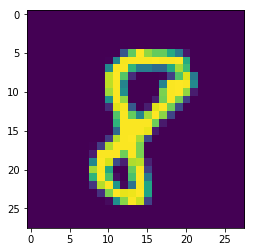

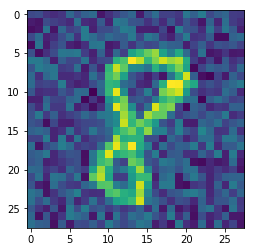

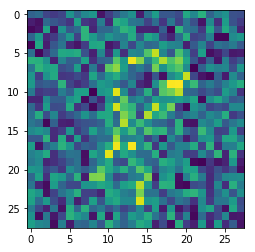

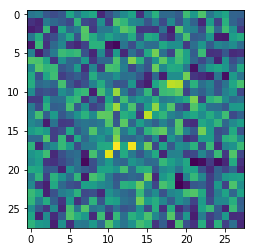

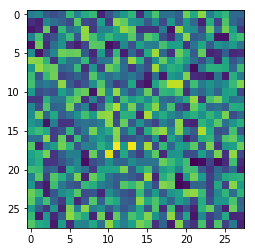

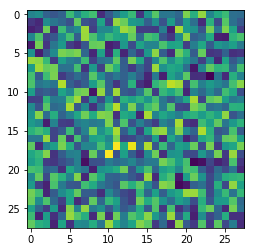

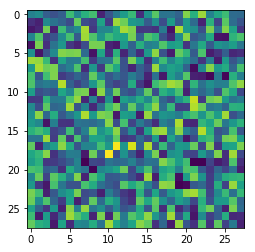

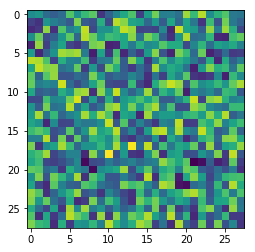

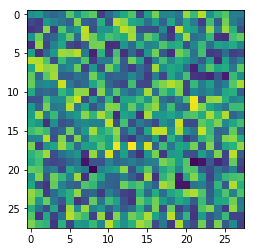

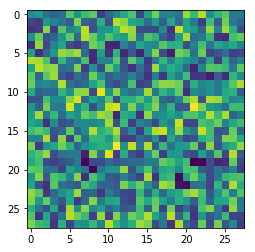

In [238]:
for i in range(10):
    plt.imshow(t[i].reshape([28,28]))
    plt.show()

In [235]:
t[10]

array([0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.77833094, 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.65626807, 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.70471248, 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.        , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.88351162, 0.999999  ,
       0.77044599, 0.999999  , 0.999999  , 0.999999  , 0.63358839,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.999999  ,
       0.999999  , 0.999999  , 0.999999  , 0.999999  , 0.99999

In [204]:
np.asarray(c).reshape([10,784]).sum(axis=0)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.58300065e-12, -1.00612851e-11, -4.61852778e-14, -7.40726924e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.74027459e-14, -2.84217094e-14, -1.42108547e-13, -1.08713039e-12,
       -1.60085278e-11, -2.08544293e-11, -2.45776732e-11, -3.39355211e-11,
       -3.36513040e-11, -4.39399628e-11, -5.02211606e-11, -3.87103682e-11,
       -3.61524144e-11, -3.72892828e-11, -1.78062010e-11, -2.56576982e-11,
       -1.58593139e-11, -1.03987929e-11, -3.16546789e-12, -9.30810984e-13,
        0.00000000e+00,  

In [180]:
t[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     